In [0]:
Project Abstract:

Project dataset links : https://data.norfolk.gov/Government/Employee-Demographics/vv96-9m5c
   
                      : https://data.norfolk.gov/Government/Employee-Salaries/4fsk-z8s8
 
The problem of job descrimination amongst Norfolk residents will continue to be a source of concern. While the reason for this still remain a mystery some might be justified
while others might not.  
This project seeks to identify 
1.	The truthfullness of this hypothesis. Is job descrimanation real or is it a myth?
2.	Are there gender inequality prevalent in the hiring system in the city of Norfolk?
3.	Who makes more in terms of salary? can your qualification account for a pay increase or the years or experience you have
4.	Racially motivated or not racially 

SyntaxError: ignored

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from nltk.corpus import stopwords
from scipy import stats, integrate

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn import datasets, linear_model

!pip install nltk

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
from google.colab import files
uploaded = files.upload()


Saving Employee_Demographics.csv to Employee_Demographics.csv
Saving Employee_Salaries.csv to Employee_Salaries.csv


In [0]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['Employee_Salaries.csv']),index_col=None)


In [0]:
df3 = pd.read_csv(io.BytesIO(uploaded['Employee_Demographics.csv']),index_col=None)

In [0]:
#Renaming columns 

df2.rename(columns={'Initial Hire Date': 'start_year','Date in Position': 'End Year' }, inplace=True)

df2.tail(1)


,Department,Position Title,Employee Status,start_year,End Year,Fair Labor Standards Act (FLSA),Base Salary
5299,Zoo-Veterinary & Wellness Camp,Zookeeper,Permanent Full-time,04/18/2007,01/15/2010,Nonexempt,33784.88


In [0]:
#Removing White spaces from column names 

# df2.columns = df2.columns.str.replace(' ', '')
df2.columns = df2.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

df2.head(5)


,department,position_title,employee_status,start_year,end_year,fair_labor_standards_act_flsa,base_salary
0,CF - MacArthur Memorial,Administrative Technician,Permanent Full-time,09/23/2015,03/19/2018,Nonexempt,32798.10
1,CF - MacArthur Memorial,Archivist,Permanent Full-time,06/01/1994,05/15/1996,Exempt,60507.96
2,CF - MacArthur Memorial,Curator,Permanent Full-time,11/03/2014,11/03/2014,Exempt,54111.33
3,CF - MacArthur Memorial,Education Manager,Permanent Full-time,10/29/2007,11/23/2009,Exempt,58367.23
4,CF - MacArthur Memorial,MacArthur Memorial Director,Permanent Full-time,09/16/2013,09/16/2013,Exempt,98456.41


In [0]:
#Removing White spaces from column names 
# df3.columns = df3.columns.str.replace('_ ', ' ')
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [0]:

df3.head(1)

,department,position_title,city,gender,ethnicity,education,military,start_year,birth_year
0,CF - MacArthur Memorial,Museum Attendant,Virginia Beach,Female,NS,A-Not Indicated,Not indicated,2007,1968


In [0]:
import datetime
# convert date column from obj to actual datetime  

df2['start_year'] = pd.to_datetime(df2['start_year']) 
df2['end_year'] = pd.to_datetime(df2['end_year'])
# df3['StartYear'] = pd.to_datetime(df3['StartYear']) 


#formatting the year column
df2['start_year'] = df2['start_year'].dt.year
df2['end_year'] = df2['end_year'].dt.year

# df3['StartYear'] = df3['StartYear'].dt.year

# df2 = df2.sort_values(['StartYear'], ascending=[True])
# df3 = df3.sort_values(['StartYear'], ascending=[True])

# df2.tail(5)


In [0]:
df2.head(2)

,department,position_title,employee_status,start_year,end_year,fair_labor_standards_act_flsa,base_salary
0,CF - MacArthur Memorial,Administrative Technician,Permanent Full-time,2015,2018,Nonexempt,32798.10
1,CF - MacArthur Memorial,Archivist,Permanent Full-time,1994,1996,Exempt,60507.96


Merging both dataframes 

In [0]:

import pandas as pd
# df4Merge = pd.merge(df2, df3,on='StartYear')
df4Merge  = df2.merge(df3, on=['start_year','position_title','department'])
df4Merge.head(1)

,department,position_title,employee_status,start_year,end_year,fair_labor_standards_act_flsa,base_salary,city,gender,ethnicity,education,military,birth_year
0,CF - MacArthur Memorial,Administrative Technician,Permanent Full-time,2015,2018,Nonexempt,32798.1,Norfolk,Female,Black,G-Bachelor's Level Degree,No Military Service,1976


**Dropping the non-Important columns in the Dataset**

In [0]:

#dropping the unnecessary columns
df4MergeDrop =  df4Merge.drop(['fair_labor_standards_act_flsa','military'], axis=1)
# df4MergeDrop.reset_index(inplace=True)
df4MergeDrop.head(1)

,department,position_title,employee_status,start_year,end_year,base_salary,city,gender,ethnicity,education,birth_year
0,CF - MacArthur Memorial,Administrative Technician,Permanent Full-time,2015,2018,32798.1,Norfolk,Female,Black,G-Bachelor's Level Degree,1976


**Showing the number of rows in each column which contains null values**

In [0]:


df4MergeDrop.isnull().sum()

department          0
position_title      0
employee_status     0
start_year          0
end_year            0
base_salary         0
city               76
gender              0
ethnicity           0
education           0
birth_year          0
dtype: int64

**Converting hourly pay found in the dataset to yearly salary**

In [0]:


df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.55),'base_salary']=24024

df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.68),'base_salary']=24294
df4MergeDrop.loc[(df4MergeDrop.base_salary == 10.21),'base_salary']=22069
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.75),'base_salary']=30680
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.16),'base_salary']=48173
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.99),'base_salary']=27019
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.33),'base_salary']=29806
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.22),'base_salary']=23338
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.87),'base_salary']=41330
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.99),'base_salary']=39499
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.61),'base_salary']=44949
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.34),'base_salary']=52707
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.56),'base_salary']=34445
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.73),'base_salary']=30638
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.83),'base_salary']=39166
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.99),'base_salary']=41579
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.91),'base_salary']=33093
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.46),'base_salary']=38397
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.55),'base_salary']=36504
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.88),'base_salary']=35110
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.23),'base_salary']=35838
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.58),'base_salary']=36566
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.94),'base_salary']=37315
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.68),'base_salary']=38854
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.74),'base_salary']=38979
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.83),'base_salary']=43326
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.17),'base_salary']=33634
df4MergeDrop.loc[(df4MergeDrop.base_salary == 7.55),'base_salary']=15704
df4MergeDrop.loc[(df4MergeDrop.base_salary == 7.86),'base_salary']=16349
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.11),'base_salary']=25189
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.00),'base_salary']=37440
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.22),'base_salary']=42058
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.00),'base_salary']=33280
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.23),'base_salary']=39998
df4MergeDrop.loc[(df4MergeDrop.base_salary == 27.39),'base_salary']=56971
df4MergeDrop.loc[(df4MergeDrop.base_salary == 28.18),'base_salary']=58614
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.20),'base_salary']=37856
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.56),'base_salary']=58614
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.94),'base_salary']=39395
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.02),'base_salary']=39541
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.70),'base_salary']=39541
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.01),'base_salary']=39541
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.10),'base_salary']=39541
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.50),'base_salary']=39541
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.70),'base_salary']=51376
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.52),'base_salary']=36026
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.70),'base_salary']=36816
df4MergeDrop.loc[(df4MergeDrop.base_salary == 27.16),'base_salary']=56493
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.88),'base_salary']=37190
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.30),'base_salary']=38064
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.41),'base_salary']=40373
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.54),'base_salary']=40643
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.34),'base_salary']=40227
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.18),'base_salary']=37814
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.30),'base_salary']=40144
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.50),'base_salary']=38480
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.62),'base_salary']=38730
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.54),'base_salary']=38563
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.60),'base_salary']=38688
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.73),'base_salary']=36878
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.21),'base_salary']=27477
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.61),'base_salary']=28309
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.32),'base_salary']=33946
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.76),'base_salary']=34861
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.12),'base_salary']=33530
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.54),'base_salary']=34403
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.01),'base_salary']=41621
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.51),'base_salary']=42661
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.53),'base_salary']=44782
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.87),'base_salary']=51730
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.04),'base_salary']=31283
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.49),'base_salary']=36379
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.72),'base_salary']=28538
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.32),'base_salary']=36026 
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.40),'base_salary']=40352
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.38),'base_salary']=40310
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.83),'base_salary']=35006
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.12),'base_salary']=33530
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.72),'base_salary']=49338
df4MergeDrop.loc[(df4MergeDrop.base_salary == 9.30),'base_salary']=19344
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.72),'base_salary']=49338
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.87),'base_salary']=33010
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.16),'base_salary']=35693

df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.79),'base_salary']=37003
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.16),'base_salary']=35693
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.69),'base_salary']=49275
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.63),'base_salary']=42910
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.80),'base_salary']=43264
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.75),'base_salary']=49400
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.28),'base_salary']=31782
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.01),'base_salary']=37461
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.72),'base_salary']=49338
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.21),'base_salary']=52437
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.30),'base_salary']=49338


df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.44),'base_salary']=23795
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.65),'base_salary']=45032
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.20),'base_salary']=46176
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.85),'base_salary']=45448
df4MergeDrop.loc[(df4MergeDrop.base_salary == 8.73),'base_salary']=18158
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.75),'base_salary']=39000
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.68),'base_salary']=30534
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.76),'base_salary']=41101
df4MergeDrop.loc[(df4MergeDrop.base_salary == 9.00),'base_salary']=18720
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.18),'base_salary']=54454
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.00),'base_salary']=22880
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.00),'base_salary']=27040
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.57),'base_salary']=34466
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.12),'base_salary']=39770
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.00),'base_salary']=41600
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.28),'base_salary']=44262
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.00),'base_salary']=45760
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.23),'base_salary']=44158
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.13),'base_salary']=35630
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.40),'base_salary']=50752
df4MergeDrop.loc[(df4MergeDrop.base_salary == 15.60),'base_salary']=32448
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.74),'base_salary']=36899

df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.08),'base_salary']=43846
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.12),'base_salary']=39770
df4MergeDrop.loc[(df4MergeDrop.base_salary == 40.76),'base_salary']=84781
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.15),'base_salary']=48152
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.54),'base_salary']=55203
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.86),'base_salary']=41309

df4MergeDrop.loc[(df4MergeDrop.base_salary == 39.78),'base_salary']=82742
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.56),'base_salary']=44845
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.55),'base_salary']=44824
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.54),'base_salary']=42723
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.66),'base_salary']=42973
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.16),'base_salary']=44013
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.46),'base_salary']=44637

df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.49),'base_salary']=44699
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.20),'base_salary']=44096
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.30),'base_salary']=46384
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.48),'base_salary']=46758
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.01),'base_salary']=54101

df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.16),'base_salary']=44013
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.76),'base_salary']=53581
df4MergeDrop.loc[(df4MergeDrop.base_salary == 30.05),'base_salary']=62504
df4MergeDrop.loc[(df4MergeDrop.base_salary == 30.63),'base_salary']=63710
df4MergeDrop.loc[(df4MergeDrop.base_salary == 30.65),'base_salary']=63752

df4MergeDrop.loc[(df4MergeDrop.base_salary == 36.21),'base_salary']=75317
df4MergeDrop.loc[(df4MergeDrop.base_salary == 32.13),'base_salary']=66830
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.74),'base_salary']=43139
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.02),'base_salary']=45802
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.09),'base_salary']=45947

df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.17),'base_salary']=52354
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.60),'base_salary']=53248
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.40),'base_salary']=52832
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.84),'base_salary']=53747
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.60),'base_salary']=53248
df4MergeDrop.loc[(df4MergeDrop.base_salary == 29.57),'base_salary']=61506
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.06),'base_salary']=45885

df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.47),'base_salary']=38418
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.53),'base_salary']=46862
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.39),'base_salary']=52811
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.76),'base_salary']=49421
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.13),'base_salary']=39790
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.92),'base_salary']=41434
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.75),'base_salary']=47320
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.47),'base_salary']=38418




df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.06),'base_salary']=41725
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.89),'base_salary']=43451
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.31),'base_salary']=44325
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.99),'base_salary']=31179
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.33),'base_salary']=27726
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.96),'base_salary']=35277

df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.87),'base_salary']=47570
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.11),'base_salary']=50149
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.06),'base_salary']=41725
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.90),'base_salary']=41392
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.93),'base_salary']=47694
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.84),'base_salary']=39187
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.79),'base_salary']=39083
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.22),'base_salary']=39978

df4MergeDrop.loc[(df4MergeDrop.base_salary == 7.70),'base_salary']=16016
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.19),'base_salary']=27435

df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.45),'base_salary']=27976
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.37),'base_salary']=23650
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.78),'base_salary']=24502
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.76),'base_salary']=24461
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.53),'base_salary']=26062
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.26),'base_salary']=25501
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.45),'base_salary']=23816
df4MergeDrop.loc[(df4MergeDrop.base_salary == 9.94),'base_salary']=20675
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.53),'base_salary']=26062
df4MergeDrop.loc[(df4MergeDrop.base_salary == 24.31),'base_salary']=50565
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.53),'base_salary']=26062
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.29),'base_salary']=52.603
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.05),'base_salary']=39624
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.23),'base_salary']=27518
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.57),'base_salary']=36546
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.21),'base_salary']=23317
df4MergeDrop.loc[(df4MergeDrop.base_salary == 9.94),'base_salary']=20675
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.400),'base_salary']=46592
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.9),'base_salary']=39312
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.2),'base_salary']=33696
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.90),'base_salary']=55952
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.05),'base_salary']=37544
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.38),'base_salary']=38230
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.300),'base_salary']=29744
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.77),'base_salary']=41122
df4MergeDrop.loc[(df4MergeDrop.base_salary == 20.82),'base_salary']=43306
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.50),'base_salary']=23920
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.27),'base_salary']=52562
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.99),'base_salary']=47819
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.62),'base_salary']=40810
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.94),'base_salary']=45635
df4MergeDrop.loc[(df4MergeDrop.base_salary == 27.94),'base_salary']=58115
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.20),'base_salary']=48256
df4MergeDrop.loc[(df4MergeDrop.base_salary == 22.36),'base_salary']=46509
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.78),'base_salary']=53622
df4MergeDrop.loc[(df4MergeDrop.base_salary == 12.35),'base_salary']=25688
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.00),'base_salary']=52000
df4MergeDrop.loc[(df4MergeDrop.base_salary == 14.70),'base_salary']=30576

df4MergeDrop.loc[(df4MergeDrop.base_salary == 28.76),'base_salary']=59821
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.91),'base_salary']=55973
df4MergeDrop.loc[(df4MergeDrop.base_salary == 18.70),'base_salary']=38896
df4MergeDrop.loc[(df4MergeDrop.base_salary == 17.90),'base_salary']=37232
df4MergeDrop.loc[(df4MergeDrop.base_salary == 19.60),'base_salary']=40768
df4MergeDrop.loc[(df4MergeDrop.base_salary == 21.17),'base_salary']=44034
df4MergeDrop.loc[(df4MergeDrop.base_salary == 13.46),'base_salary']=27997
df4MergeDrop.loc[(df4MergeDrop.base_salary == 10.62),'base_salary']=22090
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.91),'base_salary']=24773
df4MergeDrop.loc[(df4MergeDrop.base_salary == 16.65),'base_salary']=34632
df4MergeDrop.loc[(df4MergeDrop.base_salary == 30.68),'base_salary']=63814
df4MergeDrop.loc[(df4MergeDrop.base_salary == 40.87),'base_salary']=85010
df4MergeDrop.loc[(df4MergeDrop.base_salary == 28.76),'base_salary']=43181
df4MergeDrop.loc[(df4MergeDrop.base_salary == 11.15),'base_salary']=23192
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.87),'base_salary']=49650
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.00),'base_salary']=52000
df4MergeDrop.loc[(df4MergeDrop.base_salary == 26.35),'base_salary']= 54808
df4MergeDrop.loc[(df4MergeDrop.base_salary == 23.13),'base_salary']=48110
df4MergeDrop.loc[(df4MergeDrop.base_salary == 25.08),'base_salary']=52166

# df4MergeDrop


In [0]:
#filter out rows less than $100 in salary and present ones greater than 50 
df4MergeDrop= df4MergeDrop[df4MergeDrop['base_salary'] > 20]
# df4MergeDrop.head(5)

Adding a New Column called Yeardiff based on the difference between the end and start year and filtering out rows with Yeardiff > 1 

In [0]:

df4MergeDrop['Yeardiff'] = df4MergeDrop['end_year']-df4MergeDrop['start_year']
df4MergeDrop= df4MergeDrop[df4MergeDrop['Yeardiff'] > 1]
df4MergeDrop.head(2)

,department,position_title,employee_status,start_year,end_year,base_salary,city,gender,ethnicity,education,birth_year,Yeardiff
0,CF - MacArthur Memorial,Administrative Technician,Permanent Full-time,2015,2018,32798.10,Norfolk,Female,Black,G-Bachelor's Level Degree,1976,3
1,CF - MacArthur Memorial,Archivist,Permanent Full-time,1994,1996,60507.96,Va Beach,Male,White,A-Not Indicated,1963,2


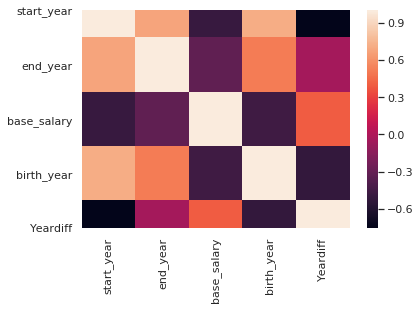

In [0]:
%matplotlib inline
corr = df4MergeDrop.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Showing the number of rows per position_Title in my dataframe** **(this is to arrive @ a position_title with the Max number of rows**
**available to perform a test on**. 

In [0]:


maxNumPosition =  df4MergeDrop['position_title'].value_counts()
maxNumPosition[maxNumPosition >20]

Police Officer                    532
Youth Services Worker             425
Firefighter EMT - Advanced        222
Deputy Sheriff                    199
Benefit Programs Specialist II    192
Police Sergeant                   155
Fire Lieutenant                   138
Fire Captain                      138
Benefit Programs Specialist I      76
Lifeguard                          75
Recreation Aide                    73
Police Corporal                    73
Family Services Worker II          73
Equipment Operator III             73
Equipment Operator II              58
Library Assistant II               56
Firefighter EMT-P                  49
School Crossing Guard              41
Police Lieutenant                  39
Crew Leader I                      38
Rec Activity Instructor            37
Benefit Programs Specialist Sr     36
Support Technician                 34
Recreation Specialist              34
Firefighter EMT-I                  31
Maintenance Worker II              30
Human Servic

In [0]:
# plt.scatter(df4MergeDrop["Yeardiff"], df4MergeDrop["base_salary"])
# plt.ylim(0,1000)
# plt.show()

**Selecting the first highest Position**

In [0]:

#  selection1  = df4MergeDrop[(df4MergeDrop['position_title'] == 'Deputy Sheriff' ) & (df4MergeDrop['base_salary']< 100)]
selection1 = df4MergeDrop[df4MergeDrop['position_title']== 'Police Officer' ]
selection1 = selection1
# selection1= selection1.groupby('ethnicity')
# selection1.first()

In [0]:
selection1= selection1[['position_title','base_salary','Yeardiff','start_year','end_year','gender','ethnicity','education']]
selection1.tail(5)

,position_title,base_salary,Yeardiff,start_year,end_year,gender,ethnicity,education
23635,Police Officer,64384.00,2,1994,1996,Male,Black,A-Not Indicated
23636,Police Officer,64384.00,2,1994,1996,Male,White,A-Not Indicated
23637,Police Officer,64384.00,2,1994,1996,Male,Black,A-Not Indicated
23638,Police Officer,64384.00,2,1994,1996,Male,White,A-Not Indicated
23639,Police Officer,65671.83,4,1992,1996,Male,White,A-Not Indicated


In [0]:
# k = (selection1[selection1.Yeardiff == selection1.Yeardiff.max()]) 
# k
# selection1.plot(figsize=(18,5))
# selection1['base_salary'].dtype

In [0]:
# plt.scatter(selection1["Yeardiff"], selection1["base_salary"])
# plt.show()

In [0]:
selectMaleWhite = selection1[(selection1['gender']== 'Male') & (selection1['ethnicity']== 'White') ]
selectFemaleWhite = selection1[(selection1['gender']== 'Female') & (selection1['ethnicity']== 'White') ]

selectFemaleHispanic = selection1[(selection1['gender']== 'Female') & (selection1['ethnicity']== 'Hispanic')]
selectMaleHispanic = selection1[(selection1['gender']== 'Male') & (selection1['ethnicity']== 'Hispanic')]

selectFemaleBlack = selection1[(selection1['gender']== 'Female') & (selection1['ethnicity']== 'Black')]
selectMaleBlack = selection1[(selection1['gender']== 'Male') & (selection1['ethnicity']== 'Black')]


selectFemaleWhite = len(selectFemaleWhite)
selectMaleWhite   =len(selectMaleWhite)
selectFemaleHispanic = len(selectFemaleHispanic)
selectMaleHispanic  = len(selectMaleHispanic)
selectFemaleBlack = len(selectFemaleBlack)
selectMaleBlack = len(selectMaleBlack)

# print'number of Female white within the Police group =' + str(selectFemaleWhite)
print("number of white Female within the Police group =", selectFemaleWhite)
print("number of white Male within the Police group =", selectMaleWhite)
print()
print("number of Hispanic Female within the Police group =", selectFemaleHispanic)
print("number of Hispanic Male within the Police group =", selectMaleHispanic)
print()
print("number of black Female within the Police group =", selectFemaleBlack)
print("number of black Male within the Police group =", selectMaleBlack)

# print(selectMaleWhite)

# print(selectFemaleHispanic)
# print(selectMaleHispanic)

# selectMaleWhite[['col2', 'col3', 'col4']].eq(1).sum()

number of white Female within the Police group = 33
number of white Male within the Police group = 310

number of Hispanic Female within the Police group = 10
number of Hispanic Male within the Police group = 28

number of black Female within the Police group = 7
number of black Male within the Police group = 110


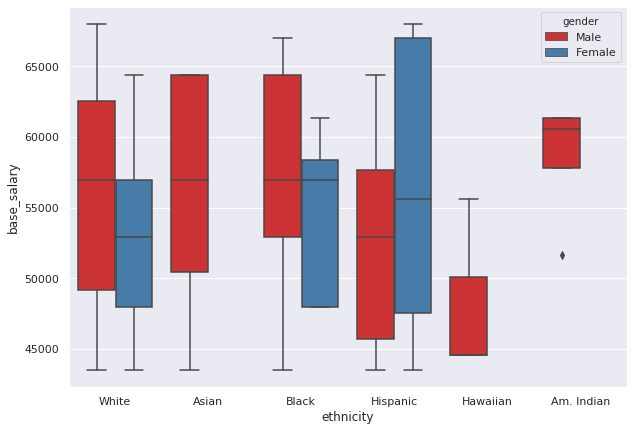

In [0]:
# sns.boxplot(data=df4MergeDrop)
plt.figure(figsize=(10,7))
sns.boxplot(x="ethnicity", y="base_salary", hue="gender", data=selection1, palette="Set1")

In [0]:

# plt.figure(figsize=(10,6))
# sns.boxplot(x="ethnicity", y="Rescalebase_salary", hue="gender", data=selection1, palette="Set2"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


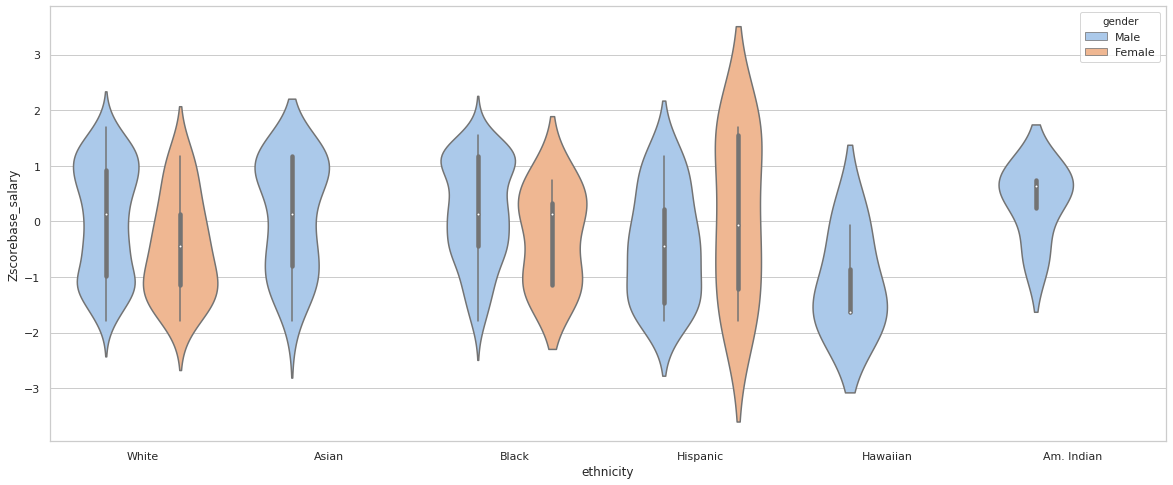

In [0]:
selection2= selection1[['base_salary']]
def zscore(selection2): 
    return (selection2 - selection2.mean(skipna=True)) / selection2.std(skipna=True);
    

selection1['Zscorebase_salary'] = selection2.apply(zscore)
selection1.head(1)

plt.figure(figsize=(20,8))
sns.violinplot(x="ethnicity",y="Zscorebase_salary", hue="gender",data=selection1,palette="pastel",split = False)



In [0]:
selection1["base_salary"].describe() 


count      532.000000
mean     56067.911259
std       7048.042667
min      43500.000000
25%      49187.000000
50%      56974.000000
75%      61318.000000
max      68004.710000
Name: base_salary, dtype: float64

No handles with labels found to put in legend.


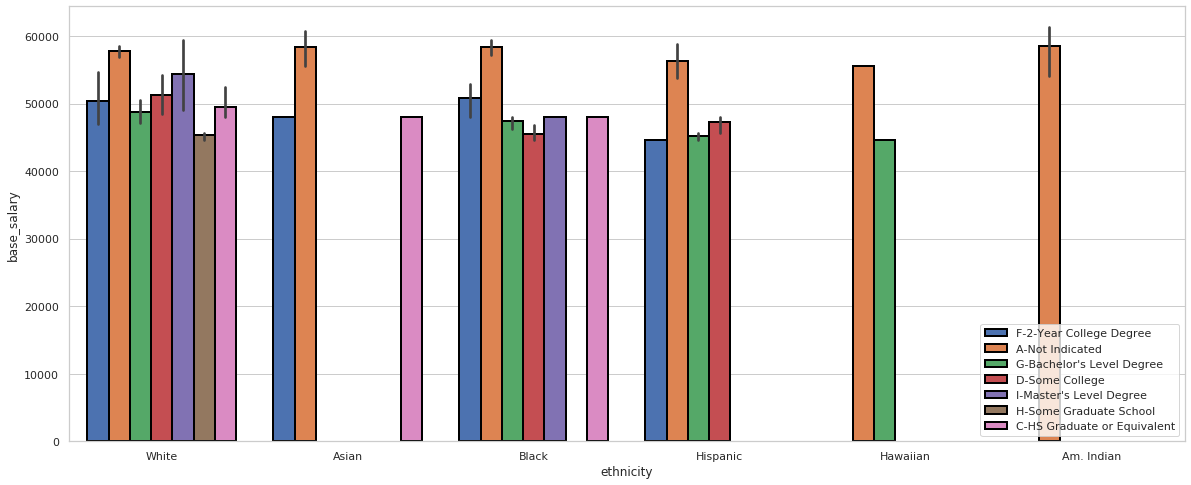

In [0]:
 plt.figure(figsize=(20,8))
plt.legend(loc='best')
 sns.set(style="whitegrid")

ax = sns.barplot(x="ethnicity", y="base_salary", hue="education", data=selection1,edgecolor=(0,0,0),
                  linewidth=2,saturation=3.5,ci=95)
ax.legend(loc='lower right')

In [0]:
# palette=["C0", "C1", "C7"]
plt.figure(figsize=20,8))
plt.legend(loc='best')
sns.set(style="whitegrid")

ax = sns.barplot(x="ethnicity", y="base_salary", hue="education", data=selection1,edgecolor=(0,0,0),
                  linewidth=2,saturation=3.5,ci=95)
ax.legend(loc='lower right')

SyntaxError: ignored

In [0]:
# sns.distplot(df4MergeDrop.base_salary)

**Selecting the 2nd Highest position for exploration Youth Service Worker**




In [0]:
selection3 = df4MergeDrop[df4MergeDrop['position_title']=='Youth Services Worker']
selection3 = selection3

selection3= selection3[['position_title','base_salary','Yeardiff','start_year','end_year','gender','ethnicity','education']]
selection3.tail(5)

,position_title,base_salary,Yeardiff,start_year,end_year,gender,ethnicity,education
37907,Youth Services Worker,15704.0,2,2017,2019,Female,Black,B-Less Than HS Graduate
37908,Youth Services Worker,15704.0,2,2017,2019,Female,Black,D-Some College
37909,Youth Services Worker,15704.0,2,2017,2019,Female,Black,D-Some College
37910,Youth Services Worker,15704.0,2,2017,2019,Female,Black,B-Less Than HS Graduate
37911,Youth Services Worker,15704.0,2,2017,2019,Male,Black,B-Less Than HS Graduate


In [0]:


selectMaleWhite = selection3[(selection3['gender']=='Male') & (selection3['ethnicity']=='White') ]
selectFemaleWhite = selection3[(selection3['gender']=='Female') & (selection3['ethnicity']=='White') ]

selectFemaleHispanic = selection3[(selection3['gender']== 'Female') & (selection3['ethnicity']=='Hispanic')]
selectMaleHispanic = selection3[(selection3['gender']== 'Male') & (selection3['ethnicity']== 'Hispanic')]

selectFemaleBlack = selection3[(selection3['gender']=='Female') & (selection3['ethnicity']== 'Black')]
selectMaleBlack = selection3[(selection3['gender']=='Male') & (selection3['ethnicity']== 'Black')]


selectFemaleWhite = len(selectFemaleWhite)
selectMaleWhite   =len(selectMaleWhite)
selectFemaleHispanic = len(selectFemaleHispanic)
selectMaleHispanic  = len(selectMaleHispanic)
selectFemaleBlack = len(selectFemaleBlack)
selectMaleBlack = len(selectMaleBlack)

# print'number of Female white within the Police group =' + str(selectFemaleWhite)
print("number of white Female in the Youth Services Worker group =", selectFemaleWhite)
print("number of white Male in the Youth Services Worker =", selectMaleWhite)
print()
print("number of Hispanic Female in the Youth Services Worker =", selectFemaleHispanic)
print("number of Hispanic Male in Youth Services Worker =", selectMaleHispanic)
print()
print("number of black Female in the Youth Services Worker =", selectFemaleBlack)
print("number of black Male in the Youth Services Worker =", selectMaleBlack)


number of white Female in the Youth Services Worker group = 0
number of white Male in the Youth Services Worker = 0

number of Hispanic Female in the Youth Services Worker = 0
number of Hispanic Male in Youth Services Worker = 0

number of black Female in the Youth Services Worker = 322
number of black Male in the Youth Services Worker = 103


**Selecting the 3rd Highest position for exploration    'FireFighter EMT Advanced '**

In [0]:
selection6 = df4MergeDrop[df4MergeDrop['position_title']=='Firefighter EMT - Advanced']
selection6 = selection6

selection6= selection6[['position_title','base_salary','Yeardiff','start_year','end_year','gender','ethnicity','education']]
selection6.tail(5)

,position_title,base_salary,Yeardiff,start_year,end_year,gender,ethnicity,education
3515,Firefighter EMT - Advanced,65368.38,4,1992,1996,Male,White,A-Not Indicated
3516,Firefighter EMT - Advanced,65368.38,4,1992,1996,Male,White,A-Not Indicated
3517,Firefighter EMT - Advanced,65368.38,4,1992,1996,Male,White,A-Not Indicated
3518,Firefighter EMT - Advanced,65368.38,11,1985,1996,Male,White,A-Not Indicated
3519,Firefighter EMT - Advanced,65368.38,15,1981,1996,Male,White,A-Not Indicated


In [0]:
selectMaleWhite   = selection6[(selection6['gender']== 'Male') & (selection6['ethnicity']== 'White') ]
selectFemaleWhite = selection6[(selection6['gender']== 'Female') & (selection6['ethnicity']== 'White') ]

selectFemaleHispanic = selection6[(selection6['gender']== 'Female') & (selection6['ethnicity']== 'Hispanic')]
selectMaleHispanic   = selection6[(selection6['gender']== 'Male') & (selection6['ethnicity']== 'Hispanic')]

selectFemaleBlack = selection6[(selection6['gender']== 'Female') & (selection6['ethnicity']== 'Black')]
selectMaleBlack   = selection6[(selection6['gender']== 'Male') & (selection6['ethnicity']=='Black')]

selectFemaleWhite = len(selectFemaleWhite)
selectMaleWhite   =len(selectMaleWhite)
selectFemaleHispanic = len(selectFemaleHispanic)  
selectMaleHispanic  = len(selectMaleHispanic)
selectFemaleBlack = len(selectFemaleBlack)
selectMaleBlack = len(selectMaleBlack)

# print'number of Female white within the Police group =' + str(selectFemaleWhite)
print("number of white Female in the Firefighter EMT group =", selectFemaleWhite)
print("number of white Male in the Firefighter EMT group =", selectMaleWhite)
print()
print("number of Hispanic Female in the Firefighter EMT group =", selectFemaleHispanic)
print("number of Hispanic Male in Firefighter EMT group=", selectMaleHispanic)
print()
print("number of black Female in the Firefighter EMT group =", selectFemaleBlack)
print("number of black Male in the Firefighter EMT group =", selectMaleBlack)


number of white Female in the Firefighter EMT group = 3
number of white Male in the Firefighter EMT group = 158

number of Hispanic Female in the Firefighter EMT group = 1
number of Hispanic Male in Firefighter EMT group= 7

number of black Female in the Firefighter EMT group = 6
number of black Male in the Firefighter EMT group = 42


**selecting the Police Sergeant Position**

In [0]:
selection8 = df4MergeDrop[df4MergeDrop['position_title']=='Police Sergeant']
selection8 = selection8
selection8

# selection8= selection8[['position_title','base_salary','Yeardiff','start_year','end_year','gender','ethnicity','education']]
# selection8.tail(5)

,department,position_title,employee_status,start_year,end_year,base_salary,city,gender,ethnicity,education,birth_year,Yeardiff
14600,Police Administration - Sworn,Police Sergeant,Permanent Full-time,2008,2019,67305.0,Virginia Beach,Male,White,A-Not Indicated,1985,11
14601,Police Administration - Sworn,Police Sergeant,Permanent Full-time,2006,2018,68988.0,Norfolk,Female,White,A-Not Indicated,1983,12
14602,Police Administration - Sworn,Police Sergeant,Permanent Full-time,2005,2019,68993.6,Chesapeake,Male,White,A-Not Indicated,1983,14
14604,Police Administration - Sworn,Police Sergeant,Permanent Full-time,1996,2006,77960.0,Virginia Beach,Male,White,A-Not Indicated,1968,10
14605,Police Administration - Sworn,Police Sergeant,Permanent Full-time,1993,2005,79909.0,Chesapeake,Male,White,A-Not Indicated,1964,12
...,...,...,...,...,...,...,...,...,...,...,...,...
23663,Police Investigative Svc-Sworn,Police Sergeant,Permanent Full-time,1994,2007,77960.0,Chesapeake,Male,White,A-Not Indicated,1968,13
23664,Police Investigative Svc-Sworn,Police Sergeant,Permanent Full-time,2002,2010,74248.0,Suffolk,Male,Black,A-Not Indicated,1970,8
23665,Police Investigative Svc-Sworn,Police Sergeant,Permanent Full-time,2006,2019,74248.0,Norfolk,Male,White,A-Not Indicated,1983,13
23666,Police Investigative Svc-Sworn,Police Sergeant,Permanent Full-time,1991,2006,77960.0,Moyock,Male,White,A-Not Indicated,1966,15


In [0]:
selectMaleWhite   = selection8[(selection8['gender']== 'Male') & (selection8['ethnicity']== 'White') ]
selectFemaleWhite = selection8[(selection8['gender']== 'Female') & (selection8['ethnicity']== 'White') ]

selectFemaleHispanic = selection8[(selection8['gender']== 'Female') & (selection8['ethnicity']== 'Hispanic')]
selectMaleHispanic   = selection8[(selection8['gender']== 'Male') & (selection8['ethnicity']== 'Hispanic')]

selectFemaleBlack = selection8[(selection8['gender']== 'Female') & (selection8['ethnicity']== 'Black')]
selectMaleBlack   = selection8[(selection8['gender']== 'Male') & (selection8['ethnicity']=='Black')]

selectMaleAsian   = selection8[(selection8['gender']== 'Male') & (selection8['ethnicity']=='Asian')]

selectFemaleWhite = len(selectFemaleWhite)
selectMaleWhite   =len(selectMaleWhite)
selectFemaleHispanic = len(selectFemaleHispanic)  
selectMaleHispanic  = len(selectMaleHispanic)
selectFemaleBlack = len(selectFemaleBlack)
selectMaleBlack = len(selectMaleBlack)

selectMaleAsian = len(selectMaleAsian)

# print'number of Female white within the Police group =' + str(selectFemaleWhite)
print("number of white Female in the Police Sergeant Position =", selectFemaleWhite)
print("number of white Male in the Police Sergeant Position =", selectMaleWhite)
print()
print("number of Hispanic Female in the Police Sergeant Position =", selectFemaleHispanic)
print("number of Hispanic Male in Police Sergeant Positionp=", selectMaleHispanic)
print()
print("number of black Female in the Police Sergeant Position =", selectFemaleBlack)
print("number of black Male in the Police Sergeant Position =", selectMaleBlack)

print ()
print("number of Asian Male in the Police Sergeant Position =", selectMaleBlack)

number of white Female in the Police Sergeant Position = 4
number of white Male in the Police Sergeant Position = 107

number of Hispanic Female in the Police Sergeant Position = 0
number of Hispanic Male in Police Sergeant Positionp= 8

number of black Female in the Police Sergeant Position = 11
number of black Male in the Police Sergeant Position = 22

number of Asian Male in the Police Sergeant Position = 22


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


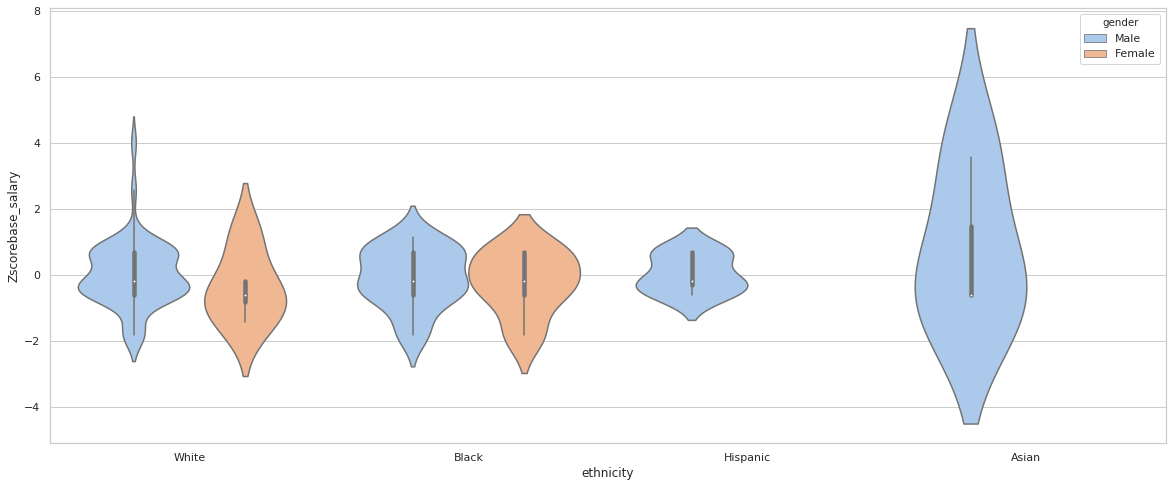

In [0]:
selection10= selection8[['base_salary']]
def zscore(selection10): 
    return (selection10 - selection10.mean(skipna=True)) / selection10.std(skipna=True);
    

selection8['Zscorebase_salary'] = selection10.apply(zscore)

plt.figure(figsize=(20,8))
sns.violinplot(x="ethnicity",y="Zscorebase_salary", hue="gender",data=selection8,palette="pastel",split = False)

#Summary

Name : Bisi Adeniran


**Disolving the Myth surrounding Gender,Ethninc and Job descrimination in the city of Norfolk**

In [0]:
from IPython.display import Image
uploaded = files.upload()

Saving Demographics2.JPG to Demographics2.JPG
Saving Police officer group.JPG to Police officer group (1).JPG
Saving Police Seargent group.JPG to Police Seargent group (1).JPG
Saving Youth workers.JPG to Youth workers (1).JPG


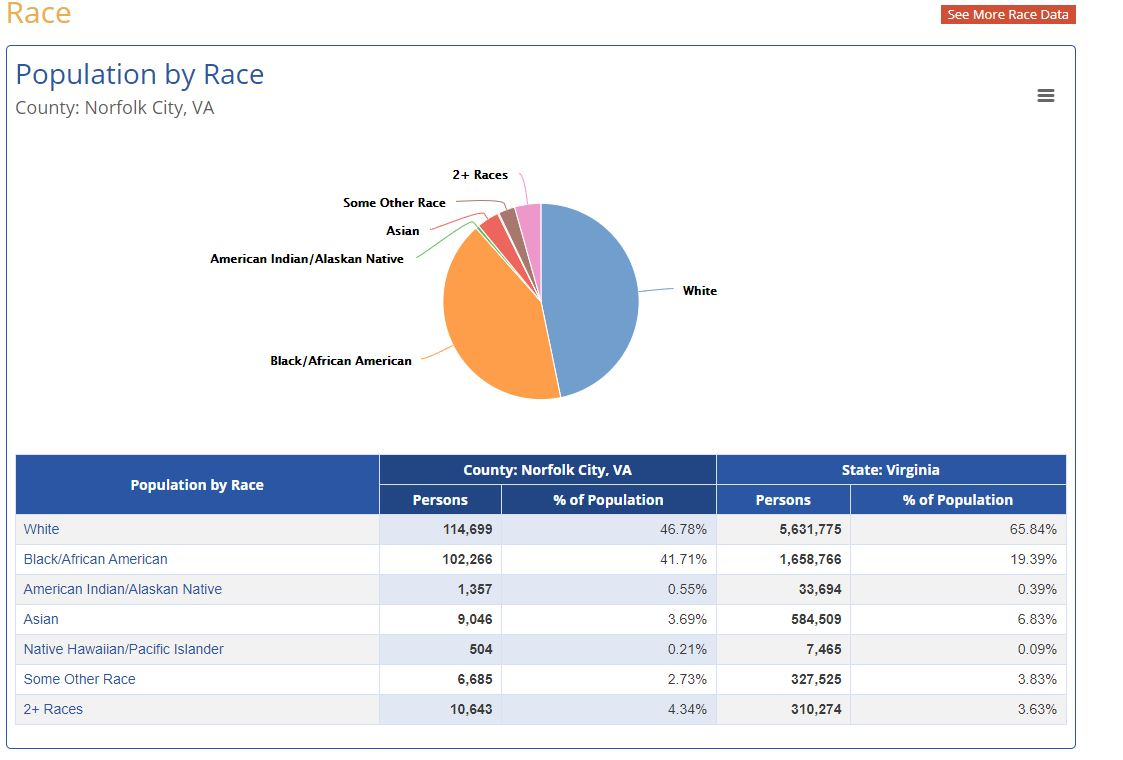

In [0]:
Image('Demographics2.JPG', width = 1000 )

In the city of Norfolk which is home to a population of over 244,000 people, one would say discrimination and bias towards certain individuals does not exist but according to the saying," The facts are in the details" and "Numbers dont lie", It could be infered from the above charts that 'YES' there is some form of discrimination going on. 




**A careful observation of the Police officer group below reveals that white female within this group earn far less in terms of base salary when compared to white male**. A robust formation at the first 25 percentile of violin plot reveals
the hypothesis is true. There were not much difference in salary between the 
Black female and Male. The Hispanics had a much rather stagggering base salary but Hispanic female do make more in terms of salary while the American Indians even though were not much,their presence in this group still had higher pay 


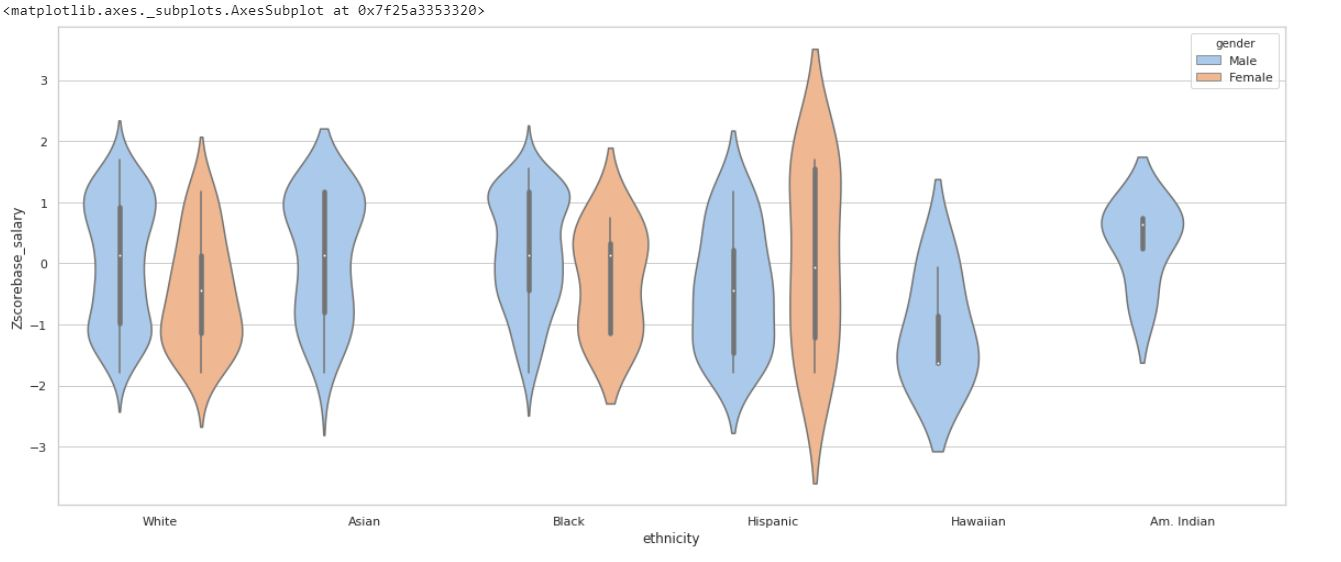

In [0]:
Image('Police officer group.JPG', width = 1000 )

Another very interesting fact obtained during this project is the skewedness of a particular ethnic and gender specific group to a position. African American female were predominat in the **YOUTH SERVICE WORKER** group while the white Male and female were far out numbered.

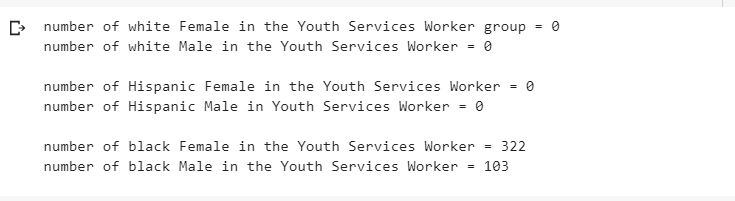

In [0]:
Image('Youth workers.JPG', width = 1000 )

**The third observation** is within the Police Seargant group. Again as a white male, you make much more in salary when compared to a white female, Both black Male and Female made about the same.though the Asians were not much there base salary were much closer to the female white in the distribution. 